# Data Distribution vs. Sampling Distribution: What You Need to Know

This notebook is accompanying the article [Data Distribution vs. Sampling Distribution: What You Need to Know](https://www.ealizadeh.com/blog/statistics-data-vs-sampling-distribution/).

**Subscribe to [my mailing list](https://www.ealizadeh.com/subscribe/)**

You can also follow me on **[Medium](https://medium.com/@ealizadeh)**, **[LinkedIn](https://www.linkedin.com/in/alizadehesmaeil/)**, and [Twitter]( https://twitter.com/es_alizadeh).

Copyright © 2021 [Esmaeil Alizadeh](https://ealizadeh.com)

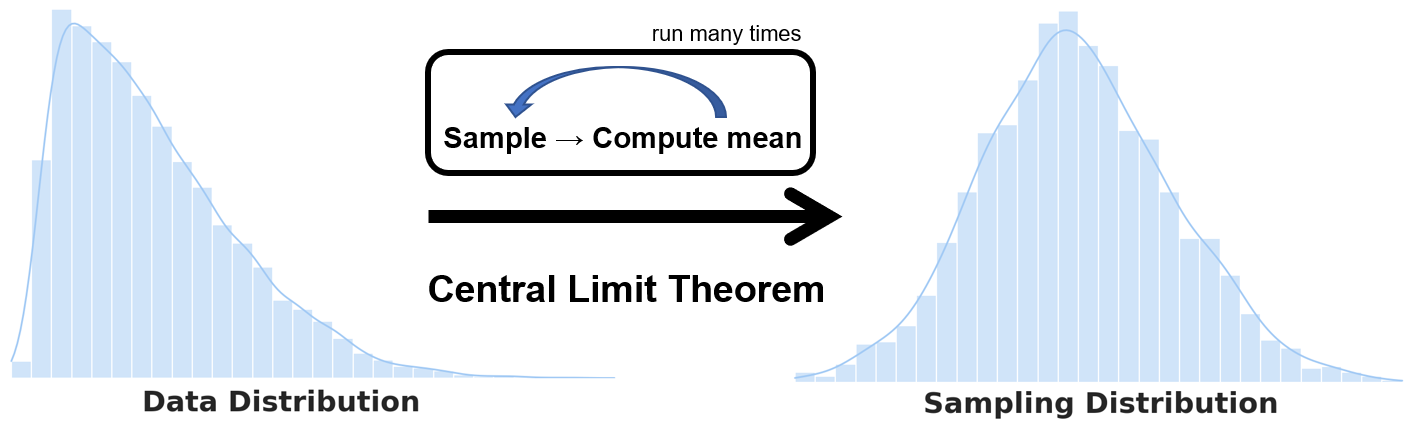

In [1]:
from IPython.display import Image
Image("https://www.ealizadeh.com/wp-content/uploads/2021/01/data_dist_sampling_dist_featured_image.png", width=1200)

---

It is important to distinguish between the data distribution (aka population distribution) and the sampling distribution. The distinction is critical when working with the central limit theorem or other concepts like the standard deviation and standard error.

In this post we will go over the above concepts and as well as bootstrapping to estimate the sampling distribution. In particular, we will cover the following:
- Data distribution (aka population distribution)
- Sampling distribution
- Central limit theorem (CLT)
- Standard error and its relation with the standard deviation
- Bootstrapping

---

## Data Distribution

Much of the statistics deals with inferring from samples drawn from a larger population. Hence, we need to distinguish between the analysis done the original data as opposed to analyzing its samples. First, let's go over the definition of the data distribution:

💡  **Data distribution:** *The frequency distribution of individual data points in the original dataset.*

### Generate Data
Let's first generate random skewed data that will result in a non-normal (non-Gaussian) data distribution. The reason behind generating non-normal data is to better illustrate the relation between data distribution and the sampling distribution.

So, let's import the Python plotting packages and generate right-skewed data. 

In [2]:
# Plotting packages and initial setup
import seaborn as sns
sns.set_theme(palette="pastel")
sns.set_style("white")

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")

In [3]:
from scipy.stats import skewnorm
from sklearn.preprocessing import MinMaxScaler

num_data_points = 10000
max_value = 100
skewness = 15   # Positive values are right-skewed

skewed_random_data = skewnorm.rvs(a=skewness, loc=max_value, size=num_data_points, random_state=1)  
skewed_data_scaled = MinMaxScaler().fit_transform(skewed_random_data.reshape(-1, 1))

Plotting the data distribution

<AxesSubplot:title={'center':'Data Distribution'}, ylabel='Density'>

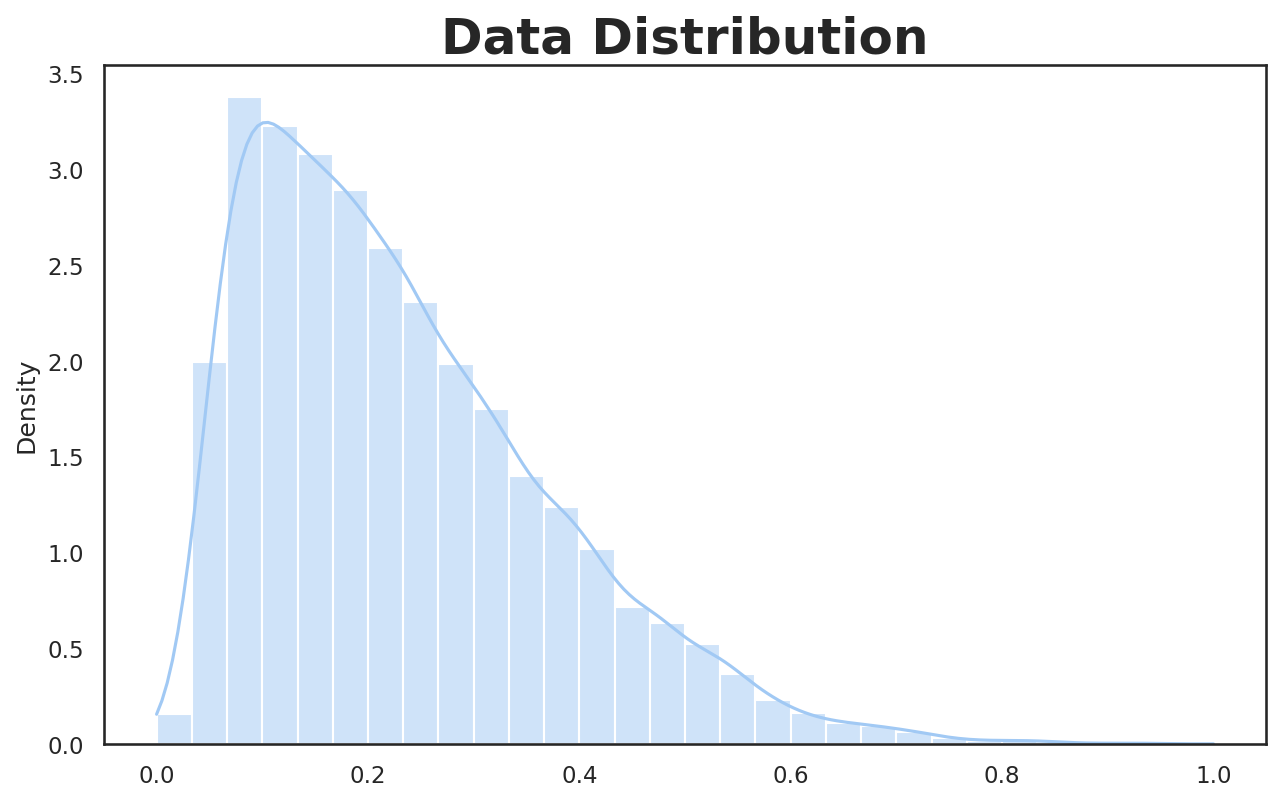

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Data Distribution", fontsize=24, fontweight="bold")

sns.histplot(skewed_data_scaled, bins=30, stat="density", kde=True, legend=False, ax=ax)

# fig.savefig("original_skewed_data_distribution.png", **savefig_options)

## Sampling Distribution
In the sampling distribution, you draw samples from the dataset and compute a statistic like the mean. It's very important to differentiate between the data distribution and the sampling distribution as most confusion comes from the operation done on either the original dataset or its (re)samples. 

💡  **Sampling distribution:** *The frequency distribution of a sample statistic (aka metric) over many samples drawn from the dataset[katex]^{[1]}[/katex]. Or to put it simply, the distribution of sample statistics is called the sampling distribution.*

The algorithm to obtain the sampling distribution is as follows: 
1. Draw a sample from the dataset.
2. Compute a statistic/metric of the drawn sample in Step 1 and save it.
3. Repeat Steps 1 and 2 many times.
4. Plot the distribution (histogram) of the computed statistic.

In [5]:
import numpy as np
import random

sample_size = 50
sample_means = []

random.seed(1) # Setting the seed for reproducibility of the result
for _ in range(2000):
    sample = random.sample(skewed_data_scaled.tolist(), sample_size) 
    sample_means.append(np.mean(sample))
                    
print(
    f"Mean: {np.mean(sample_means).round(5)}"
)

Mean: 0.23269


<AxesSubplot:title={'center':'Sampling Distribution'}, ylabel='Density'>

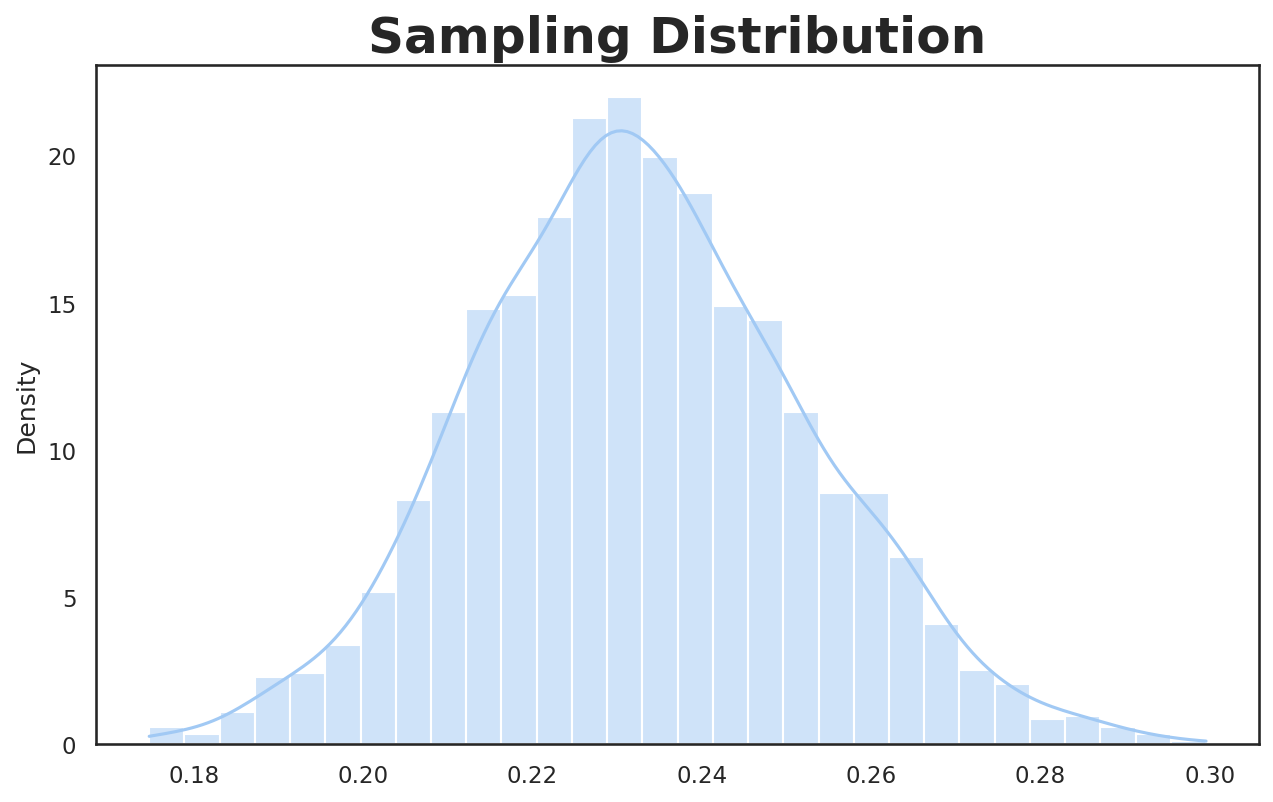

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Sampling Distribution", fontsize=24, fontweight="bold")

sns.histplot(sample_means, bins=30, stat="density", kde=True, legend=False)

# fig.savefig("sampling_distribution.png", **savefig_options)

Above sampling distribution is basically the histogram of the mean of each drawn sample (in above, we draw samples of 50 elements over 2000 iterations). The mean of the above sampling distribution is around 0.23, as can be noted from computing the mean of all samples means.

⚠️ *Do not confuse the sampling distribution with the sample distribution. The sampling distribution considers the distribution of sample statistics (e.g. mean), whereas the sample distribution is basically the distribution of the sample taken from the population.*

## Central Limit Theorem (CLT)
💡  **Central Limit Theorem:** *As the sample size gets larger, the sampling distribution tends to be more like a normal distribution (bell-curve shape).*

*In CLT, we analyze the sampling distribution and not a data distribution, an important distinction to be made.* CLT is popular in hypothesis testing and confidence interval analysis, and it's important to be aware of this concept, even though with the use of bootstrap in data science, this theorem is less talked about or considered in the practice of data science$^{[1]}$. More on bootstrapping is provided later in the post.

## Standard Error (SE)
The [standard error](https://en.wikipedia.org/wiki/Standard_error) is a metric to describe *the variability of a statistic in the sampling distribution*. We can compute the standard error as follows: 
$$ \text{Standard Error} = SE = \frac{s}{\sqrt{n}} $$
where $s$ denotes the standard deviation of the sample values and $n$ denotes the sample size. It can be seen from the formula that *as the sample size increases, the SE decreases*. 

We can estimate the standard error using the following approach$^{[1]}$:

1. Draw a new sample from a dataset.
2. Compute a statistic/metric (e.g., mean) of the drawn sample in Step 1 and save it.
3. Repeat Steps 1 and 2 several times.
4. An estimate of the standard error is obtained by computing the standard deviation of the previous steps' statistics.

While the above approach can be used to estimate the standard error, we can use bootstrapping instead, which is preferable. I will go over that in the next section.

⚠️ *Do not confuse the standard error with the standard deviation. The standard deviation captures the variability of the individual data points (how spread the data is), unlike the standard error that captures a sample statistic's variability.*

## Bootstrapping
Bootstrapping is an easy way of estimating the sampling distribution by randomly drawing samples from the population (with replacement) and computing each resample's statistic. Bootstrapping does not depend on the CLT or other assumptions on the distribution, and it is the standard way of estimating SE$^{[1]}$.

Luckily, we can use [`bootstrap()`](https://rasbt.github.io/mlxtend/user_guide/evaluate/bootstrap/) functionality from the [MLxtend library](https://rasbt.github.io/mlxtend/) (You can read [my post](https://www.ealizadeh.com/blog/mlxtend-library-for-data-science/) on MLxtend library covering other interesting functionalities). This function also provides the flexibility to pass a custom sample statistic.

In [7]:
from mlxtend.evaluate import bootstrap

avg, std_err, ci_bounds = bootstrap(
    skewed_data_scaled, 
    num_rounds=1000, 
    func=np.mean,  # A function to compute a sample statistic can be passed here
    ci=0.95, 
    seed=123 # Setting the seed for reproducibility of the result
)

print(
    f"Mean: {avg.round(5)} \n"
    f"Standard Error: +/- {std_err.round(5)} \n"
    f"CI95: [{ci_bounds[0].round(5)}, {ci_bounds[1].round(5)}]"
)

Mean: 0.23293 
Standard Error: +/- 0.00144 
CI95: [0.23023, 0.23601]


## Conclusion
The main takeaway is to differentiate between whatever computation you do on the original dataset or the sampling of the dataset. Plotting a histogram of the data will result in data distribution, whereas plotting a sample statistic computed over samples of data will result in a sampling distribution. On a similar note, the standard deviation tells us how the data is spread, whereas the standard error tells us how a sample statistic is spread out. 

Another takeaway is that even if the original data distribution is non-normal, the sampling distribution is normal (central limit theorem). 

Thanks for reading!

___If you liked this post, you can [join my mailing list here](https://www.ealizadeh.com/subscribe/) to receive more posts about Data Science, Machine Learning, Statistics, and interesting Python libraries and tips & tricks. You can also follow me on my [website](https://ealizadeh.com/), [Medium](https://medium.com/@ealizadeh), [LinkedIn](https://www.linkedin.com/in/alizadehesmaeil/), or [Twitter](https://twitter.com/es_alizadeh).___

# References
[1]  P. Bruce & A. Bruce (2017), Practical Statistics for Data Scientists, First Edition, O’Reilly

# Useful Links
[MLxtend: A Python Library with Interesting Tools for Data Science Tasks](https://www.ealizadeh.com/blog/mlxtend-library-for-data-science/)